# Import Required libraries

In [13]:
# Basic libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input,
                                     Dense,
                                     Flatten, 
                                     Conv2D,
                                     MaxPooling2D,
                                     Dropout)
from tensorflow.keras.optimizers import (Adam,
                                         RMSprop)


# Load Dataset - Mnist Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


# 1. Sample Visualization

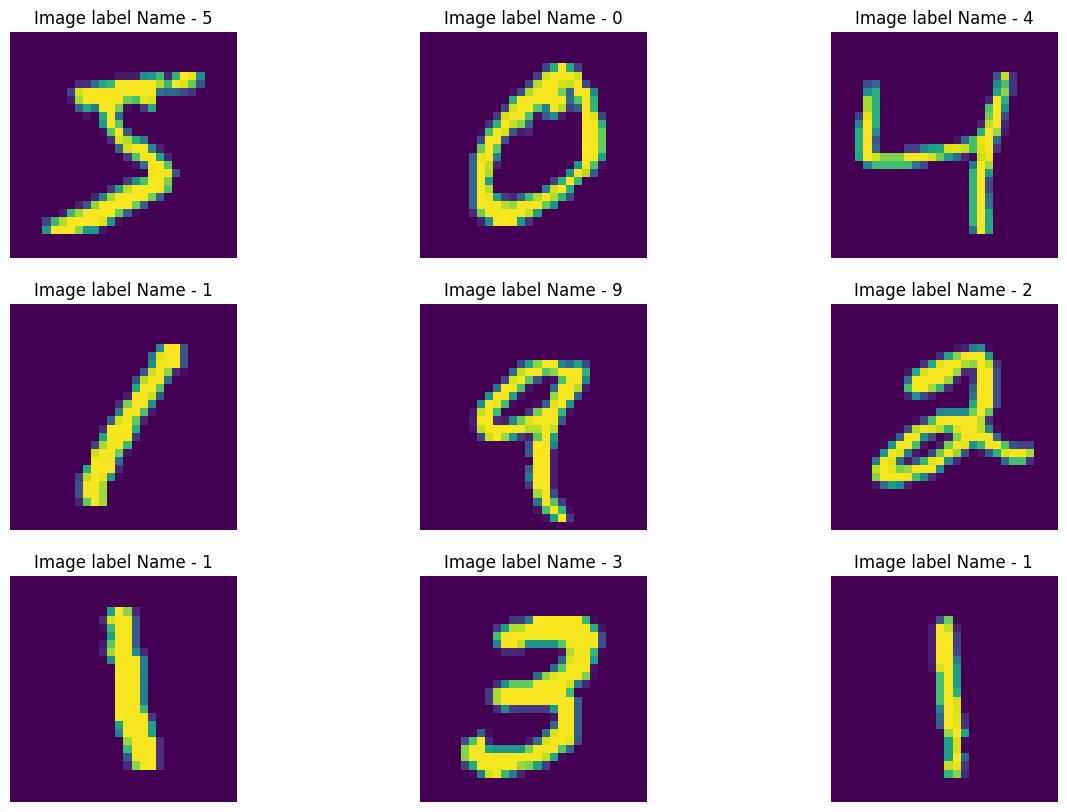

In [9]:
plt.figure(figsize= (15, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, :, :])
    plt.title(f"Image label Name - {y_train[i]}")
    plt.axis('off')
plt.show()

# ResNet18 - Architecture


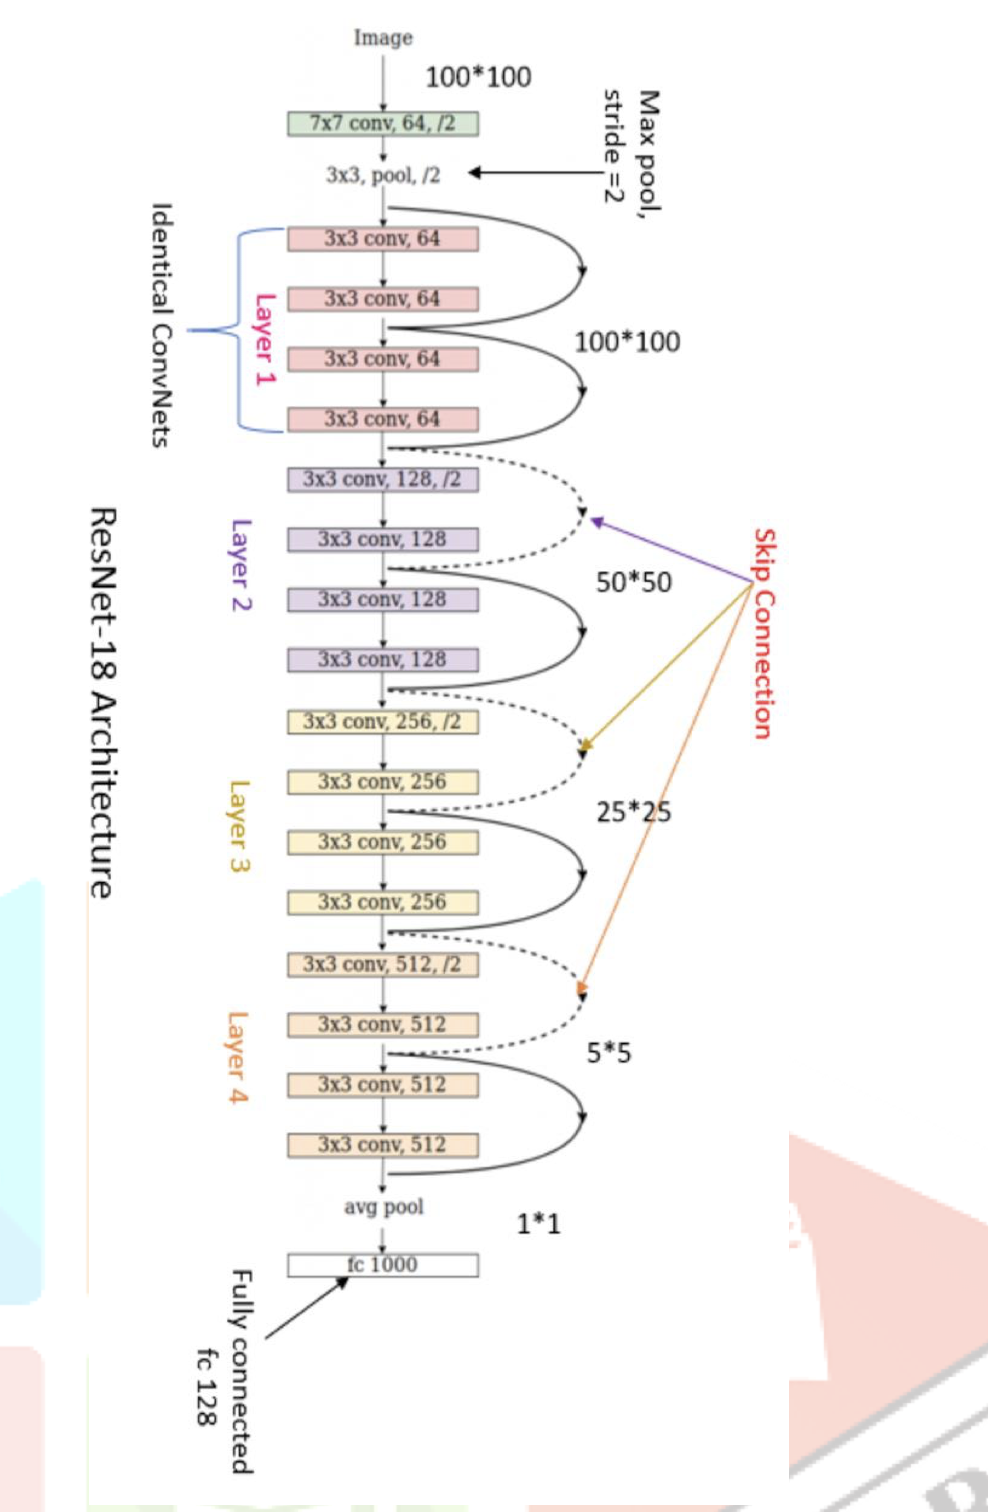


We are going to implement ResNet18 Architecture using model subclassing approach 

In [14]:
class CNNResidualNetwork(Model):

    # Initialization layer
    def __init__(self, layers, filters = 32, kernel_size = (3, 3), activation = None):
        super(CNNResidualNetwork, self).__init__()
        self.layers = layers
        self.filters = filters
        self.kernel_size = kernel_size
        self.activation = tf.keras.activations.get(activation)
        self.hidden = [Conv2D(filters = self.filters, kernel_size = self.kernel_size, activation = self.activation)
                       for _ in range(self.layers)]

    def call(self, inputs):    
        x = inputs 
        for layer in self.hidden:
            x = layer(x)

        return inputs + x

In [ ]:
class DNN(Model):

    def __init__(self, units = 32, activation = None):
        super(DNN, self).__init__()

In [ ]:
class ResNet18(Model):

    def __init__(self, **kwargs):
        super(ResNet18, self).__init__()
        self.initial_convolution_layer = Conv2D(filters = 64, kernel_size= (7, 7), stride =2, activation = "relu")
        self.initial_max_pooling_layer = MaxPooling2D(kernel_size = (3,3), stride = 2)

        # layer 1
        self.initial_layer_1 = Conv2D(filters = 64, kernel_size = (3,3), stride =2, activation = 'relu')
        self.hidden_1 = CNNResidualNetwork(layers = 2, filters=64, kernel_size= (3,3), activation = 'relu')

        # layer 2
        self.initial_layer_2 = Conv2D(filters = 128, kernel_size = (3,3), stride =2, activation = "relu")
        self.hidden_2 = CNNResidualNetwork(layers = 2, filters=128, kernel_size= (3,3), activation = 'relu')

        # layer 3
        self.initial_layer_3 = Conv2D(filters = 256, kernel_size = (3,3), stride =2, activation = "relu")
        self.hidden_3 = CNNResidualNetwork(layers = 2, filters = 256, kernel_size= (3,3), activation = 'relu')

        # flatten and fully connected layers
        self.flatten= Flatten()
        self.


    def call(self, inputs):



Help on class Conv2D in module keras.src.layers.convolutional.conv2d:

class Conv2D(keras.src.layers.convolutional.base_conv.BaseConv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer.
 |  
 |  This layer creates a convolution kernel that is convolved with the layer
 |  input over a 2D spatial (or temporal) dimension (height and width) to
 |  produce a tensor of outputs. If `use_bias` is True, a bias vector is created
 |  and added to the outputs. Finally, if `activation` is not `None`, it is
 |  applied to the outputs as well.
 |  
 |  Note on numerical precision: While in general Keras operation execution
 |  results are identical across backends up to 1e-7 precision in float32,
 |  `Conv2D` operations may show larger variations. Due to the large
 |  number of element-wise multiplications and additions in convolution
 |  operations, especially with large inputs or kernel sizes, accumulated
 |  floating-point differences can exceed this 1e-7 threshold. These variations
 |  ar